In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit,execute,Aer
from qiskit.quantum_info.states.random import random_statevector
import numpy as np
import cmath
from math import pi
from random import uniform
from scipy.optimize import minimize
import itertools
from qiskit.aqua.components.optimizers import AQGD

In [2]:
# CZ coupling map
cz_coupling= list(itertools.combinations(range(4), 2))

def layer_block(k):
    layer=QuantumCircuit(4)
    param_idx = 0
    for d in range(k):
        for q_i in range(4):
            layer.rx(p[param_idx],q_i)     
            param_idx+=1
        for q_i in range(4):
            layer.rz(p[param_idx],q_i)
            param_idx+=1
        for cz_index in cz_coupling:
            layer.cz(cz_index[0],cz_index[1])   
        layer.barrier()
    return layer

In [3]:
backend = Aer.get_backend('statevector_simulator') 

def layer_result(circ,angle):
    layer_bind=circ.bind_parameters({p:angle})
    out_state=execute(layer_bind,backend).result().get_statevector(decimals=6)
    return out_state

In [4]:
def state_distance(guess):
    ans_circ=layer_block(num_layers)
    ans=layer_result(ans_circ,guess)
    dif=np.linalg.norm(ans-phi)
    return dif

In [5]:
phi=random_statevector(dims=16).data
print('phi = ',phi)

phi =  [ 0.00252004-0.19689983j  0.24223627+0.14843834j  0.15944866-0.02652774j
  0.00726271+0.02651641j  0.11044643+0.014327j   -0.19737711-0.20657687j
 -0.31640198-0.10540717j -0.11062279-0.05346119j  0.15396199+0.46750402j
  0.0660578 +0.0297914j   0.20524518-0.25124078j -0.09584207+0.00176186j
 -0.02990602+0.08471515j  0.19673663+0.30199951j  0.13984515+0.27602377j
 -0.15843515-0.11179092j]


In [6]:
number_layers=[x for x in range(1,9)]
parameter_set=[]
converge_result=[]
status=[]
optimizer=AQGD(maxiter=1000,eta=1.1)

In [7]:
for i in range(len(number_layers)):
    num_layers=number_layers[i]
    print("Number of Layer : " + str(num_layers))
    p = ParameterVector('p', 8*num_layers) 
    #angle = np.random.uniform(0,2*pi,8*num_layers)
    angle = np.zeros(8*num_layers)
    bnds=[(0,2*pi)]*num_layers*8
    opt_ans=minimize(state_distance,x0=angle,method='SLSQP',bounds=bnds)
    converge_result.append(opt_ans.fun)
    parameter_set.append(opt_ans.x)     
    status.append(opt_ans.success)
    print("Optimize result : ",opt_ans.fun,'\n')


Number of Layer : 1
Optimize result :  1.2885461976092538 

Number of Layer : 2
Optimize result :  0.7132620455333296 

Number of Layer : 3
Optimize result :  0.31821147454258764 

Number of Layer : 4
Optimize result :  0.22715314894757405 

Number of Layer : 5
Optimize result :  0.18509645896182578 

Number of Layer : 6
Optimize result :  0.038702102301826316 

Number of Layer : 7
Optimize result :  5.7628878452367046e-05 

Number of Layer : 8
Optimize result :  9.202460593801992e-05 



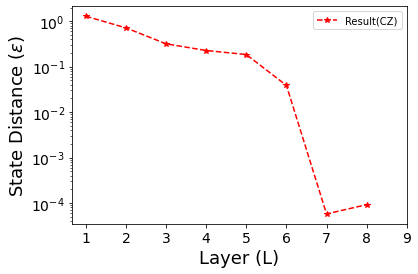

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(14,8))
plt.xlabel('Layer (L)',fontsize=18)
plt.ylabel('State Distance ($\epsilon$)',fontsize=18)
plt.plot(number_layers, converge_result,'r*--',label='Result(CZ)')
my_x_ticks = np.arange(1, 10, 1)
plt.xticks(my_x_ticks,fontsize=14)
plt.yscale('log')
#plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()